<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/3_Analisis_y_visualizacion_datos/6_Preprocesamiento_y_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# 🔧🧩**Preprocesamiento y feature engineering**

👉 Último paso antes de machine learning: adaptar los datos para los algoritmos.

✅ Resultado: dataset listo para modelar con aprendizaje supervisado o no supervisado.

**Objetivos de Aprendizaje**

Al finalizar este notebook, serás capaz de:

1.  **Diseñar nuevas variables (`features`)** relevantes para problemas económicos a partir de datos existentes.
2.  **Preprocesar y limpiar datos** para que sean consumibles por algoritmos de machine learning, manejando variables categóricas y valores atípicos (`outliers`).
3.  **Transformar y escalar variables numéricas** para mejorar el rendimiento y la interpretabilidad de los modelos.

**Introducción**

Imagina que trabajas como analista cuantitativo en un banco comercial. Tu tarea es decidir si aprobar o rechazar solicitudes de crédito. Una mala decisión (aprobar un crédito a alguien que no pagará) genera pérdidas. Otra mala decisión (rechazar un crédito a alguien que sí pagaría) implica un costo de oportunidad. Tu objetivo es construir un modelo que automatice y mejore esta decisión.

Recibes un conjunto de datos históricos de clientes, con información demográfica (edad, sexo), financiera (cuentas de ahorro, historial crediticio) y del préstamo solicitado (monto, duración, propósito). Estos son los "datos crudos".

Un modelo de machine learning no puede simplemente "leer" esta información. No entiende qué significa "propósito: auto nuevo" o qué implicaciones tiene una edad de 25 años frente a una de 60. Tu labor es actuar como un **traductor** y un **arquitecto**: traduces los datos a un lenguaje numérico que el modelo entienda y construyes nuevas variables que capturen de forma más precisa el **riesgo económico** de cada solicitante.

-   Cuando un analista de crédito calcula el **ratio de endeudamiento** (deuda total / ingreso anual), está haciendo **feature engineering**.
-   Cuando clasifica a un cliente como 'joven', 'adulto' o 'senior', está **discretizando una variable continua** (la edad) para capturar efectos no lineales del ciclo de vida.
-   Cuando convierte el propósito del crédito ('auto', 'educación', 'vacaciones') a un formato numérico, está **codificando variables categóricas**.

En resumen, estamos transformando datos en bruto en **indicadores de riesgo con significado económico** que un algoritmo pueda aprovechar. La calidad de nuestro modelo de scoring dependerá críticamente de la calidad de estas variables. Un buen conjunto de *features* puede hacer que un modelo simple supere a un modelo complejo con datos mal preparados.

**"Basura entra, basura sale" (`Garbage In, Garbage Out`)**. La calidad de nuestro modelo depende críticamente de la calidad de nuestras variables.

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Mejorar visualización de los dataframes y los gráficos

In [3]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Configuraciones para una mejor visualización de los gráficos
sns.set_style("whitegrid")
%matplotlib inline

## Cargar el dataset

Usaremos el dataset **German Credit Data** (https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data), el cual contiene información sobre 1000 solicitantes de crédito. El conjunto de datos incluye a individuos a quienes efectivamente se les otorgó un crédito. No contiene información sobre los solicitantes que fueron rechazados.

Para cada uno de estos 1000 individuos, el banco ya realizó una clasificación de riesgo a posteriori, es decir, después de observar su comportamiento de pago. **La columna objetivo es Risk (o 'Riesgo')** indica si, con el tiempo, el cliente resultó ser un buen pagador (cumplió con sus obligaciones) o un mal pagador (incurrió en impago o default).

Por lo tanto, el objetivo de un modelo entrenado con estos datos no es decidir si se aprueba o no un crédito (ya que todos fueron aprobados), sino predecir, en el momento de la solicitud, la probabilidad de que un cliente aprobado se convierta en un mal pagador en el futuro.

**Fuente Original:** Los datos fueron donados al repositorio de Machine Learning de la UCI (University of California, Irvine) por el Profesor Dr. Hans Hofmann del Instituto de Estadística y Econometría de la Universidad de Hamburgo.

**Banco**: Aunque la información proviene de un banco real, el nombre del banco no se ha hecho público para mantener la confidencialidad. Los datos fueron anonimizados.

**Período de Tiempo:** La información corresponde a créditos otorgados en Alemania aproximadamente entre 1973 y 1975. Esto es importante tenerlo en cuenta, ya que el contexto económico y social de esa época (Alemania Occidental antes de la reunificación) es muy diferente al actual. Por ejemplo, los montos en Marcos Alemanes (DM) y los perfiles de empleo pueden no ser directamente extrapolables a la economía de hoy, pero los patrones de comportamiento de riesgo crediticio siguen siendo muy valiosos para el aprendizaje.

In [5]:
# Cargar el dataset desde una URL pública
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
# Los nombres de las columnas se encuentran en la documentación del dataset
columns = ['Estado de la cuenta corriente existente', 'Duración en meses', 'Historia de crédito', 'Propósito',
           'Monto del crédito',
           'Cuenta de ahorros/bonos', 'Empleo actual desde',
           'Tasa de pago a plazos en porcentaje del ingreso disponible',
           'Estado personal y sexo', 'Otros deudores/fiadores', 'Residencia actual desde', 'Propiedad',
           'Edad', 'Otros planes de pago', 'Alojamiento', 'Número de créditos existentes en este banco',
           'Trabajo', 'Número de personas obligadas a prestar manutención a', 'Teléfono', 'Trabajador extranjero',
           'Riesgo']

df = pd.read_csv(url, sep=' ', header=None, names=columns)

# Vistazo inicial a los datos
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (1000, 21)


,Estado de la cuenta corriente existente,Duración en meses,Historia de crédito,Propósito,Monto del crédito,Cuenta de ahorros/bonos,Empleo actual desde,Tasa de pago a plazos en porcentaje del ingreso disponible,Estado personal y sexo,Otros deudores/fiadores,Residencia actual desde,Propiedad,Edad,Otros planes de pago,Alojamiento,Número de créditos existentes en este banco,Trabajo,Número de personas obligadas a prestar manutención a,Teléfono,Trabajador extranjero,Riesgo
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
# --- 1. Definición de los Diccionarios de Mapeo ---

# Atributo 1: Estado de la cuenta corriente existente
estado_cuenta_corriente_map = {
    'A11': 'Menos de 0 DM',
    'A12': 'Entre 0 y 200 DM',
    'A13': 'Más de 200 DM / Salario asignado',
    'A14': 'Sin cuenta corriente'
}

# Atributo 3: Historial crediticio
historial_crediticio_map = {
    'A30': 'Sin créditos / Todos pagados',
    'A31': 'Todos los créditos en este banco pagados',
    'A32': 'Créditos existentes pagados hasta ahora',
    'A33': 'Retraso en pagos en el pasado',
    'A34': 'Cuenta crítica / Otros créditos'
}

# Atributo 4: Propósito del crédito
proposito_map = {
    'A40': 'Automóvil (nuevo)',
    'A41': 'Automóvil (usado)',
    'A42': 'Muebles / Equipo',
    'A43': 'Radio / Televisión',
    'A44': 'Electrodomésticos',
    'A45': 'Reparaciones',
    'A46': 'Educación',
    'A48': 'Reciclaje',
    'A49': 'Negocios',
    'A410': 'Otros'
}

# Atributo 6: Cuenta de ahorros/bonos
cuenta_ahorros_map = {
    'A61': 'Menos de 100 DM',
    'A62': 'Entre 100 y 500 DM',
    'A63': 'Entre 500 y 1000 DM',
    'A64': 'Más de 1000 DM',
    'A65': 'Desconocido / Sin cuenta'
}

# Atributo 7: Empleo actual desde
empleo_actual_map = {
    'A71': 'Desempleado',
    'A72': 'Menos de 1 año',
    'A73': 'Entre 1 y 4 años',
    'A74': 'Entre 4 y 7 años',
    'A75': 'Más de 7 años'
}

# Atributo 9: Estado civil y sexo
estado_civil_sexo_map = {
    'A91': 'Hombre: divorciado/separado',
    'A92': 'Mujer: divorciada/separada/casada',
    'A93': 'Hombre: soltero',
    'A94': 'Hombre: casado/viudo',
    'A95': 'Mujer: soltera'
}

# Atributo 10: Otros deudores/fiadores
otros_deudores_map = {
    'A101': 'Ninguno',
    'A102': 'Co-solicitante',
    'A103': 'Garante'
}

# Atributo 12: Propiedad
propiedad_map = {
    'A121': 'Bienes inmuebles',
    'A122': 'Seguro de vida / Ahorro para vivienda',
    'A123': 'Automóvil u otro',
    'A124': 'Desconocido / Sin propiedad'
}

# Atributo 14: Otros planes de pago
otros_planes_pago_map = {
    'A141': 'Banco',
    'A142': 'Tiendas',
    'A143': 'Ninguno'
}

# Atributo 15: Alojamiento
vivienda_map = {
    'A151': 'Alquiler',
    'A152': 'Propia',
    'A153': 'Gratuita'
}

# Atributo 17: Trabajo
empleo_map = {
    'A171': 'Desempleado / No cualificado - no residente',
    'A172': 'No cualificado - residente',
    'A173': 'Empleado cualificado / Funcionario',
    'A174': 'Directivo / Autónomo / Altamente cualificado'
}

# Atributo 19: Teléfono
telefono_map = {
    'A191': 'No tiene',
    'A192': 'Sí, a su nombre'
}

# Atributo 20: trabajador extranjero
trabajador_extranjero_map = {
    'A201': 'Sí',
    'A202': 'No'
}

# --- 2. Aplicación de los Mapeos al DataFrame ---
# Creamos una copia para trabajar de forma segura
df_mapeado = df.copy()

# Se aplica el mapeo a cada columna usando los nombres en español
df_mapeado['Estado de la cuenta corriente existente'] = df_mapeado['Estado de la cuenta corriente existente'].map(estado_cuenta_corriente_map)
df_mapeado['Historia de crédito'] = df_mapeado['Historia de crédito'].map(historial_crediticio_map)
df_mapeado['Propósito'] = df_mapeado['Propósito'].map(proposito_map)
df_mapeado['Cuenta de ahorros/bonos'] = df_mapeado['Cuenta de ahorros/bonos'].map(cuenta_ahorros_map)
df_mapeado['Empleo actual desde'] = df_mapeado['Empleo actual desde'].map(empleo_actual_map)
df_mapeado['Estado personal y sexo'] = df_mapeado['Estado personal y sexo'].map(estado_civil_sexo_map)
df_mapeado['Otros deudores/fiadores'] = df_mapeado['Otros deudores/fiadores'].map(otros_deudores_map)
df_mapeado['Propiedad'] = df_mapeado['Propiedad'].map(propiedad_map)
df_mapeado['Otros planes de pago'] = df_mapeado['Otros planes de pago'].map(otros_planes_pago_map)
df_mapeado['Alojamiento'] = df_mapeado['Alojamiento'].map(vivienda_map)
df_mapeado['Trabajo'] = df_mapeado['Trabajo'].map(empleo_map)
df_mapeado['Teléfono'] = df_mapeado['Teléfono'].map(telefono_map)
df_mapeado['Trabajador extranjero'] = df_mapeado['Trabajador extranjero'].map(trabajador_extranjero_map)

# --- 3. Verificación de los Resultados ---
print("DataFrame con valores reemplazados y columnas en español:")
display(df_mapeado.head())

DataFrame con valores reemplazados y columnas en español:


,Estado de la cuenta corriente existente,Duración en meses,Historia de crédito,Propósito,Monto del crédito,Cuenta de ahorros/bonos,Empleo actual desde,Tasa de pago a plazos en porcentaje del ingreso disponible,Estado personal y sexo,Otros deudores/fiadores,Residencia actual desde,Propiedad,Edad,Otros planes de pago,Alojamiento,Número de créditos existentes en este banco,Trabajo,Número de personas obligadas a prestar manutención a,Teléfono,Trabajador extranjero,Riesgo
0,Menos de 0 DM,6,Cuenta crítica / Otros créditos,Radio / Televisión,1169,Desconocido / Sin cuenta,Más de 7 años,4,Hombre: soltero,Ninguno,4,Bienes inmuebles,67,Ninguno,Propia,2,Empleado cualificado / Funcionario,1,"Sí, a su nombre",Sí,1
1,Entre 0 y 200 DM,48,Créditos existentes pagados hasta ahora,Radio / Televisión,5951,Menos de 100 DM,Entre 1 y 4 años,2,Mujer: divorciada/separada/casada,Ninguno,2,Bienes inmuebles,22,Ninguno,Propia,1,Empleado cualificado / Funcionario,1,No tiene,Sí,2
2,Sin cuenta corriente,12,Cuenta crítica / Otros créditos,Educación,2096,Menos de 100 DM,Entre 4 y 7 años,2,Hombre: soltero,Ninguno,3,Bienes inmuebles,49,Ninguno,Propia,1,No cualificado - residente,2,No tiene,Sí,1
3,Menos de 0 DM,42,Créditos existentes pagados hasta ahora,Muebles / Equipo,7882,Menos de 100 DM,Entre 4 y 7 años,2,Hombre: soltero,Garante,4,Seguro de vida / Ahorro para vivienda,45,Ninguno,Gratuita,1,Empleado cualificado / Funcionario,2,No tiene,Sí,1
4,Menos de 0 DM,24,Retraso en pagos en el pasado,Automóvil (nuevo),4870,Menos de 100 DM,Entre 1 y 4 años,3,Hombre: soltero,Ninguno,4,Desconocido / Sin propiedad,53,Ninguno,Gratuita,2,Empleado cualificado / Funcionario,2,No tiene,Sí,2


In [7]:
df_mapeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Estado de la cuenta corriente existente                     1000 non-null   object
 1   Duración en meses                                           1000 non-null   int64 
 2   Historia de crédito                                         1000 non-null   object
 3   Propósito                                                   1000 non-null   object
 4   Monto del crédito                                           1000 non-null   int64 
 5   Cuenta de ahorros/bonos                                     1000 non-null   object
 6   Empleo actual desde                                         1000 non-null   object
 7   Tasa de pago a plazos en porcentaje del ingreso disponible  1000 non-null   int64 
 8   Estado pe

### Reemplazo de dos categorías por 1 y 0

La variable `Riesgo` está codificada como 1 para 'Bueno' y 2 para 'Malo'. Vamos a recodificarla a 0 para 'Bueno' y 1 para 'Malo', que es la convención en problemas de clasificación de riesgo (el evento de interés, el 'default', es 1).

In [8]:
# Usamos .map() para la recodificación
df_mapeado['Riesgo'] = df_mapeado['Riesgo'].map({1: 0, 2: 1})

print("Distribución de la variable objetivo 'Riesgo':")
print(df_mapeado['Riesgo'].value_counts(normalize=True))

Distribución de la variable objetivo 'Riesgo':
Riesgo
0   0.70
1   0.30
Name: proportion, dtype: float64


Vemos un desbalance: 70% de los clientes son buenos y 30% son malos.

## Feature Engineering

**Creación de nuevas variables a partir de las existentes.**

Ejemplos:

- PIB per cápita = PIB / población
- Tasa de dependencia = población joven + mayor / población en edad de trabajar
- Índice de concentración = exportaciones top 3 países / exportaciones totales

Técnicas:

- Transformaciones matemáticas (log, raíz cuadrada).
- Variables de interacción (multiplicar dos variables).
- Variables temporales (día, mes, trimestre, año).

### Creación de variables a partir de operaciones entre columnas

Una variable muy común en el análisis de crédito es la relación entre el monto del crédito y su duración. Un crédito muy grande a un plazo muy corto puede ser más riesgoso.

**Hipótesis Económica:** La "cuota mensual implícita" (aunque no es exacta sin la tasa de interés) puede ser un indicador de la carga financiera.

In [9]:
df_mapeado['Proxy pago mensual'] = df_mapeado['Monto del crédito'] / df_mapeado['Duración en meses']

In [10]:
df_mapeado[['Proxy pago mensual']].head(3)

,Proxy pago mensual
0,194.83
1,123.98
2,174.67


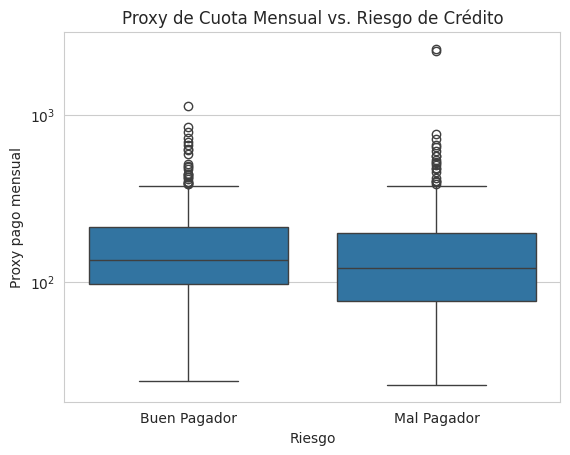

In [11]:
# Visualicemos la relación entre esta nueva variable y el riesgo
sns.boxplot(x='Riesgo', y='Proxy pago mensual', data=df_mapeado)
plt.title('Proxy de Cuota Mensual vs. Riesgo de Crédito')
plt.xticks([0, 1], ['Buen Pagador', 'Mal Pagador'])
plt.yscale('log')
plt.show()

# Interpretación: La mediana de la cuota mensual implícita es ligeramente más baja para los malos pagadores.
# por lo que no parece que una mayor carga financiera mensual esté asociada con un mayor riesgo de incumplimiento.


### Transformaciones matemáticas

In [12]:
df_mapeado['Log Monto del crédito'] = np.log(df_mapeado['Monto del crédito'])
df_mapeado[['Monto del crédito', 'Log Monto del crédito']].head()

,Monto del crédito,Log Monto del crédito
0,1169,7.06
1,5951,8.69
2,2096,7.65
3,7882,8.97
4,4870,8.49


### Asignación de valores según los valores de otra columna



In [13]:
df_mapeado['Trabajador extranjero'].value_counts(dropna=False)

,count
Trabajador extranjero,
Sí,963
No,37


In [14]:
df_mapeado['Trabajador extranjero 2'] = np.where(df_mapeado['Trabajador extranjero'] == 'Sí', 1, 0)
df_mapeado[['Trabajador extranjero', 'Trabajador extranjero 2']].sample(5)

,Trabajador extranjero,Trabajador extranjero 2
464,Sí,1
545,Sí,1
217,Sí,1
851,Sí,1
402,Sí,1


### Ejercicio

Crea una nueva variable llamada "Cantidad de créditos" donde tenga la etiqueta "Pocos créditos" si la persona solo tiene 1 o 2 créditos y "Muchos créditos" si tiene 3 o más. Utiliza np.where y los valores de la columna 'Número de créditos existentes en este banco'.

In [16]:
cantidad_de_creditos = np.where(df_mapeado['Número de créditos existentes en este banco'] <= 2, 'Pocos créditos', 'Muchos créditos')
df_mapeado['Cantidad de créditos'] = cantidad_de_creditos
df_mapeado[['Número de créditos existentes en este banco', 'Cantidad de créditos']].head()

,Número de créditos existentes en este banco,Cantidad de créditos
0,2,Pocos créditos
1,1,Pocos créditos
2,1,Pocos créditos
3,1,Pocos créditos
4,2,Pocos créditos


### Crear variables utilizando funciones

#### Utilizando una función que se aplica al valor de una columna

In [17]:
df_mapeado['Empleo actual desde'].value_counts(dropna=False)

,count
Empleo actual desde,
Entre 1 y 4 años,339
Más de 7 años,253
Entre 4 y 7 años,174
Menos de 1 año,172
Desempleado,62


In [18]:
def categoria_empleo(categoria):
  if categoria == 'Menos de 1 año':
    return 0
  elif categoria == 'Entre 1 y 4 años':
    return 1
  elif categoria == 'Entre 4 y 7 años':
    return 2
  elif categoria == 'Más de 7 años':
    return 3
  else:
    return -1

df_mapeado['Empleo actual desde 2'] = df_mapeado['Empleo actual desde'].apply(categoria_empleo)
df_mapeado[['Empleo actual desde', 'Empleo actual desde 2']].head()

,Empleo actual desde,Empleo actual desde 2
0,Más de 7 años,3
1,Entre 1 y 4 años,1
2,Entre 4 y 7 años,2
3,Entre 4 y 7 años,2
4,Entre 1 y 4 años,1


#### Utilizando una función que se aplica al valor de varias columnas

In [19]:
df_mapeado['Número de personas obligadas a prestar manutención a'].value_counts(dropna=False)

,count
Número de personas obligadas a prestar manutención a,
1,845
2,155


In [20]:
df_mapeado['Alojamiento'].value_counts(dropna=False)

,count
Alojamiento,
Propia,713
Alquiler,179
Gratuita,108


In [21]:
def nivel_gastos(alojamiento, personas):
  if alojamiento == 'Propia' and personas == 1:
    return 'Gastos bajos'
  elif alojamiento == 'Gratuita' and personas == 1:
    return 'Gastos bajos'
  elif alojamiento == 'Gratuita' and personas == 2:
    return 'Gastos altos'
  else:
    return 'Gastos altos'

df_mapeado['Nivel gastos'] = df_mapeado.apply(lambda x: nivel_gastos(x['Alojamiento'], x['Número de personas obligadas a prestar manutención a']), axis=1)
df_mapeado[['Alojamiento', 'Número de personas obligadas a prestar manutención a', 'Nivel gastos']].head()

,Alojamiento,Número de personas obligadas a prestar manutención a,Nivel gastos
0,Propia,1,Gastos bajos
1,Propia,1,Gastos bajos
2,Propia,2,Gastos altos
3,Gratuita,2,Gastos altos
4,Gratuita,2,Gastos altos


#### Ejercicio

Utiliza funciones para crear una columna llamada "Bienes inmuebles" que tenga el valor de 1 si en la columna "Propiedad" dice "Bienes inmuebles" y cero si no.


In [ ]:
def es_bienes_inmuebles(propiedad):
  if propiedad == 'Bienes inmuebles':
    return 1
  else:
    return 0

### A partir de fechas

In [23]:
 df_mapeado['Año'] = df_mapeado['Fecha'].dt.year
 df_mapeado['Mes'] = df_mapeado['Fecha'].dt.month
 df_mapeado['Dia'] = df_mapeado['Fecha'].dt.dayofweek
 df_mapeado['Hora de la transacción'].dt.hour
 df_mapeado['Minuto de la transacción'].dt.minute

KeyError: 'Fecha'

### Crear variables categóricas a partir de numéricas (Binning)

La edad es una variable continua, pero su efecto sobre el riesgo puede no ser lineal. Por ejemplo, tanto los muy jóvenes (poca experiencia financiera) como los muy mayores (ingresos inciertos post-retiro) pueden ser más riesgosos. Podemos agrupar la edad en categorías.

In [24]:
# Usamos pd.cut para crear los "bins" o categorías de edad
bins = [18, 30, 50, 100]
labels = ['Joven', 'Adulto', 'Senior']
df_mapeado['Grupo edad'] = pd.cut(df_mapeado['Edad'], bins=bins, labels=labels, right=False)

df_mapeado[['Edad', 'Grupo edad']].head()

,Edad,Grupo edad
0,67,Senior
1,22,Joven
2,49,Adulto
3,45,Adulto
4,53,Senior


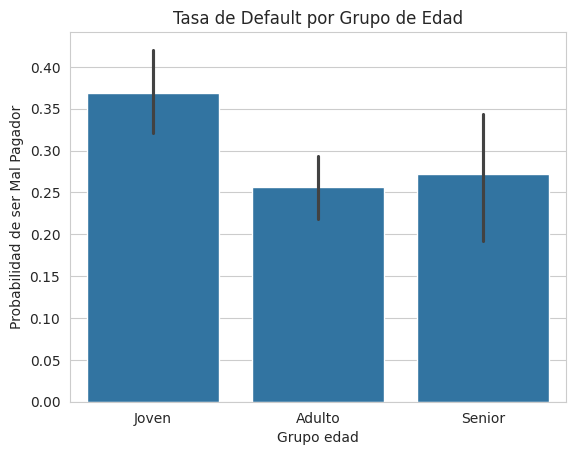

In [25]:
# Visualizamos su impacto
sns.barplot(x='Grupo edad', y='Riesgo', data=df_mapeado)
plt.title('Tasa de Default por Grupo de Edad')
plt.ylabel('Probabilidad de ser Mal Pagador')
plt.show()

# Interpretación: Los solicitantes más jóvenes tienen una tasa de incumplimiento más alta.
# Esta nueva variable captura este efecto del ciclo de vida de una forma muy clara.

### Ejercicio

Usando el `df_mapeado`, crea una nueva variable categórica llamada `'Grupo monto crédito'` que clasifique el monto del crédito (`Monto del crédito`) en:
- 'Bajo' (monto < 2000)
- 'Medio' (2000 <= monto < 5000)
- 'Alto' (monto >= 5000)

Luego, crea un gráfico de barras para visualizar la relación entre `'Grupo monto crédito'` y `'Riesgo'`. ¿Qué grupo parece ser más riesgoso?

Text(0, 0.5, 'Probabilidad de ser Mal Pagador')

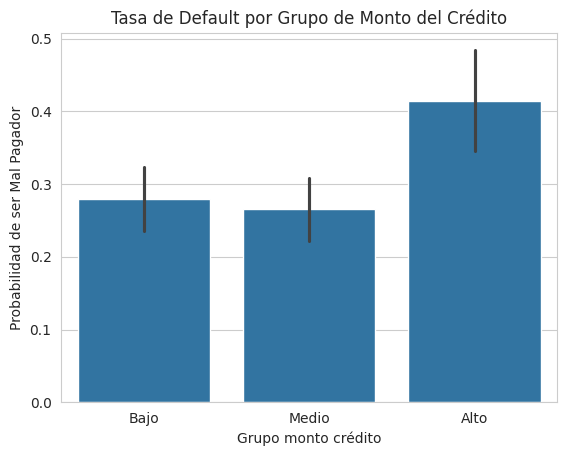

In [27]:
df_mapeado['Grupo monto crédito'] = pd.cut(df_mapeado['Monto del crédito'], bins=[0, 2000, 5000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

sns.barplot(x='Grupo monto crédito', y='Riesgo', data=df_mapeado)
plt.title('Tasa de Default por Grupo de Monto del Crédito')
plt.ylabel('Probabilidad de ser Mal Pagador')

## Codificación de Variables Categóricas

Los modelos de machine learning son funciones matemáticas; no entienden texto como "carro nuevo" o "educación". Debemos convertir estas categorías en números de forma inteligente.

### Ejercicio

Recategoriza la columna "Teléfono" colocando 1 si no tiene teléfono y 0 si lo tiene.

In [28]:
# Recodificamos la columna 'Teléfono'
df_mapeado['Teléfono codificado'] = df_mapeado['Teléfono'].map({'No tiene': 1, 'Sí, a su nombre': 0})

print("Distribución de la variable 'Teléfono codificado':")
print(df_mapeado['Teléfono codificado'].value_counts(normalize=True))
print("\nVerificación de los resultados:")
display(df_mapeado[['Teléfono', 'Teléfono codificado']].head())

Distribución de la variable 'Teléfono codificado':
Teléfono codificado
1   0.60
0   0.40
Name: proportion, dtype: float64

Verificación de los resultados:


,Teléfono,Teléfono codificado
0,"Sí, a su nombre",0
1,No tiene,1
2,No tiene,1
3,No tiene,1
4,No tiene,1


### One-Hot Encoding: Para variables nominales

Se usa cuando las categorías no tienen un orden inherente. Por ejemplo, el Propósito del crédito. Crear una columna binaria (0/1) para cada propósito evita que el modelo asuma un orden falso (ej. que 'educación' es "mayor" que 'automóvil').

**Notas:**
- En los modelos de regresión hay que borrar una de las dummies, para árboles de decisión no es necesario.
- Lo más conveniente es quitar aquella dummy que tenga más observaciones.
- Los NA deben ser otra variable dummy.

In [ ]:
df_mapeado['Propósito'].value_counts(dropna=False)

In [ ]:
# Aplicamos One-Hot Encoding a la variable 'Propósito'
dummies = pd.get_dummies(df_mapeado['Propósito'], prefix='Propósito', drop_first=True, dtype=int, dummy_na=True) # drop_first para evitar multicolinealidad perfecta

# Unimos los dummies al DataFrame original y eliminamos la columna original
df_mapeado = pd.concat([df_mapeado, dummies], axis=1)
df_mapeado.drop('Propósito', axis=1, inplace=True)

print("DataFrame con One-Hot Encoding para 'Propósito':")
df_mapeado.head()

### Ejercicio

Aplica One-Hot Encoding a la variable "Estado personal y sexo".

In [30]:

dummies_sexo = pd.get_dummies(df_mapeado['Estado personal y sexo'], prefix='Estado personal y sexo', drop_first=True, dtype=int, dummy_na=False) # drop_first para evitar multicolinealidad perfecta

df_mapeado = pd.concat([df_mapeado, dummies_sexo], axis=1)
df_mapeado.drop('Estado personal y sexo', axis=1, inplace=True)

print("DataFrame con One-Hot Encoding para 'Estado personal y sexo':")
df_mapeado.head()

KeyError: 'Estado personal y sexo'

### Label Encoding (Mapeo Manual): Para variables ordinales

Se usa cuando las categorías SÍ tienen un orden claro. Por ejemplo, `Cuenta de ahorros/bonos`. La documentación nos dice que A61 = < 100 DM, A62 = 100 <= ... < 500 DM, etc. Hay un orden claro.

**¡Cuidado!** Usar el `LabelEncoder` de scikit-learn puede asignar números alfabéticamente (A61=0, A62=1, ...), lo que podría ser correcto por casualidad. Es más seguro y explícito hacer un mapeo manual para garantizar que el orden económico se preserve.

In [ ]:
df_mapeado['Cuenta de ahorros/bonos'].value_counts(dropna=False)

In [ ]:
# Mapeo explícito para asegurar el orden correcto
savings_map = {'Menos de 100 DM': 0, 'Entre 100 y 500 DM': 1,
               'Entre 500 y 1000 DM': 2, 'Más de 1000 DM': 3,
               'Desconocido / Sin cuenta': -1} # Asignamos -1 a desconocido

df_mapeado['Cuenta de ahorros codificada'] = df_mapeado['Cuenta de ahorros/bonos'].map(savings_map)

print("DataFrame con Label Encoding para Cuentas de Ahorro:")
df_mapeado[['Cuenta de ahorros/bonos', 'Cuenta de ahorros codificada']].head()

In [ ]:
# Ejemplo de cómo se haría con LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
# Creamos una instancia del codificador.
le = LabelEncoder()

df_mapeado['Cuenta de ahorros codificada le'] = le.fit_transform(df_mapeado['Cuenta de ahorros/bonos'])
df_mapeado[['Cuenta de ahorros/bonos', 'Cuenta de ahorros codificada', 'Cuenta de ahorros codificada le']].head()

¿Cuándo usar LabelEncoder y cuándo tener cuidado? ⚠️

- **Ideal para la variable objetivo (y):** Es la herramienta perfecta para codificar la variable que quieres predecir en un problema de clasificación. Por ejemplo, si quieres predecir ['Perro', 'Gato', 'Pájaro'], LabelEncoder los convertirá a [2, 0, 1], lo cual es perfecto.

- **Cuidado al usarlo en variables predictoras (X):** Debes tener precaución al usar LabelEncoder en tus variables de entrada. El problema es que crea una relación ordinal artificial, basada en un orden alfabético.

## Tratamiento de Outliers (Valores Atípicos)

Los outliers son observaciones extremas que pueden distorsionar nuestros modelos, especialmente los lineales. Imagina analizar el 'Monto del crédito'; un crédito inusualmente grande puede sesgar las relaciones que el modelo aprende.

In [ ]:
# Detectemos outliers en la variable 'Monto del crédito'
sns.boxplot(x=df_mapeado['Monto del crédito'])
plt.title('Detección de Outliers en el Monto del Crédito')
plt.show()

In [ ]:
# Cálculo de los límites con el Rango Intercuartílico (IQR)
Q1 = df_mapeado['Monto del crédito'].quantile(0.25)
Q3 = df_mapeado['Monto del crédito'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

print(f"Límite superior para Monto del crédito: {limite_superior:.2f}")

outliers = df_mapeado[df_mapeado['Monto del crédito'] > limite_superior]
print(f"\nNúmero de outliers detectados: {len(outliers)}")

### Tratamiento de Outliers: Capping (Acotamiento)

Una estrategia común es el "capping", que consiste en reemplazar los valores atípicos con el valor del límite superior. Así no perdemos la observación completa, solo reducimos su influencia extrema.

In [ ]:
# Hacemos una copia para el ejemplo
df_capped = df_mapeado.copy()

# Aplicamos el capping
df_capped['Monto del crédito'] = np.where(df_capped['Monto del crédito'] > limite_superior,
                                      limite_superior,
                                      df_capped['Monto del crédito'])

In [ ]:
# Comprobamos visualmente
sns.boxplot(x=df_capped['Monto del crédito'])
plt.title('Monto del Crédito después del Capping')
plt.show()

### Tratamiento de Outliers: logaritmo natural

In [ ]:
# Previamente ya habíamos calculado el logaritmo natural del monto del crédito
#df_mapeado['Log Monto del crédito'] = np.log(df_mapeado['Monto del crédito'])
df_mapeado[['Monto del crédito', 'Log Monto del crédito']].head()

In [ ]:
sns.boxplot(x=df_mapeado['Log Monto del crédito'])
plt.title('Logaritmo natural Monto del crédito')
plt.show()

## Escalado y Normalización de Variables

Muchos algoritmos son sensibles a la escala. Si la edad va de 18 a 75 y el monto del crédito de 2.500 a 180.000, el modelo podría darle más importancia al monto solo por su magnitud numérica. Por eso, debemos poner las variables en una escala comparable. Es como comparar el PIB per cápita (en miles de USD) con la tasa de desempleo (en %), sus escalas son muy diferentes.

El escalado y la normalización son técnicas de preprocesamiento de datos que ajustan la escala de las variables numéricas para que todas estén en un rango específico.

- Se aplica cuando hay más de una variable predictora, para evitar efectos de escala entre variables que pueden tener rangos de valores muy distintos.
- No siempre es necesario, pero no perjudica aplicarlo.
- Sí es necesario para todos los algoritmos basados en distancia, como KNN y K_means, y sensibles a la escala como redes neuronales y máquinas de soporte vectorial.

### Estandarización (StandardScaler)

Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.

Es la técnica más común y robusta.

Permite ver cuántas desviaciones estándar se aleja cada individuo de la media en cada indicador.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Seleccionamos las columnas numéricas que queremos escalar
cols_to_scale = ['Duración en meses', 'Monto del crédito', 'Edad', 'Proxy pago mensual']

# Creamos los nombres para las nuevas columnas escaladas
scaled_cols = [col + '_scaled' for col in cols_to_scale]

# Ajustamos y transformamos
df_capped[scaled_cols] = scaler.fit_transform(df_capped[cols_to_scale])

print("Media y Desv. Est. de las variables escaladas:")
print(df_capped[scaled_cols].describe().loc[['mean', 'std']])

df_capped[cols_to_scale + scaled_cols].head()

### Normalización (MinMaxScaler)

Ajusta la escala de las variables numéricas para que todas estén en un rango entre 0 y 1.

En otras palabras, toma cada columna numérica, encuentra el valor mínimo y máximo, y reescala todos los valores de esa columna de la siguiente manera:

- El valor mínimo original se convierte en 0.
- El valor máximo original se convierte en 1.
- Todos los demás valores se transforman a un decimal proporcional dentro de ese rango.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Seleccionamos las columnas numéricas que queremos escalar
cols_to_norm = ['Duración en meses', 'Monto del crédito', 'Edad', 'Proxy pago mensual']

# Creamos los nombres para las nuevas columnas escaladas
norm_cols = [col + '_norm' for col in cols_to_norm]

# Ajustamos y transformamos
df_capped[norm_cols] = min_max_scaler.fit_transform(df_capped[cols_to_norm])

print("Mínimo y máximo de las variables normalizadas:")
print(df_capped[norm_cols].describe().loc[['min', 'max']])

df_capped[cols_to_norm + norm_cols].head()
#df_escalado = pd.DataFrame(data=df_escalado, columns=df.columns)

In [ ]:
df_capped.info()